In [36]:
import xarray as xr
import matplotlib.pyplot as plt
import geopandas as gpd
from jupyterthemes import jtplot
import pandas as pd
from IPython.display import HTML
import matplotlib.animation as ani

jtplot.style(theme='grade3')

In [6]:
#User-supplied
#obsfile = '/glade/p/work/manab/fcast/data/dly/obsflow.dly.HHDW1.csv'
summaoutfile = '/glade/p/work/manab/fcast/PNW/output/final.nc'
#routefile = '/glade/p/work/manab/fcast/PNW_route/output/q_out.nc'
polyshp = '/glade/p/work/manab/fcast/data/shapefile/Region_17_merged_hru.shp'
segshp =  '/glade/p/work/manab/fcast/data/shapefile/Region17_merged_seg.shp'

In [30]:
summaout = xr.open_dataset(summaoutfile).set_index(hru = 'hruId')   
hrus = summaout['hru'].values
print(hrus)

[17000001 17000002 17000003 ..., 17906164 17906165 17906166]


In [31]:
polydat = gpd.read_file(polyshp)                #Imports the polygon shapefile
polydat = polydat[polydat.geometry.notnull()]
polydat = polydat.to_crs({'init': 'epsg:4326'}) #Reprojection for lat-long in map
polydat.head(2)

,OBJECTID,POI_ID,PROD_UNIT,hru_elev,hru_id2,Y_Centroid,X_Centroid,Basin_Area,seg_hru_id,Elev_Avg,Lon_Centro,Lat_Centro,geometry
0,1,23336004,17a,1829.0,17000001,2.213807e+06,-1.665466e+06,1.202901e+08,17001133,1890.24521,-116.20479,41.33139,POLYGON ((-116.1746602138565 41.40417605744236...
1,2,23198872,17a,1902.0,17000002,2.214667e+06,-1.555784e+06,1.248356e+08,17000804,1959.87124,-114.91219,41.53916,(POLYGON ((-114.6447601321217 41.5900497438992...


In [32]:
segdat = gpd.read_file(segshp)                #Imports the segment shapefile
segdat = segdat[segdat.geometry.notnull()]
segdat = segdat.to_crs({'init': 'epsg:4326'}) #Converts for lat-long in map
segdat.head(2)

,DrainID,Region,tosegment2,tosegment,seg_id,seg_id2,POI_ID,TOCOMID2,To_POI_ID,ToFTYPE,...,start_y,TopElev,start_lon,start_lat,end_x,end_y,BotElev,end_lon,end_lat,geometry
0,5447,17,17906894,6894,6892,17906892,0.0,0,0,None,...,3498210.0,1002.0,-119.58342,52.73771,-1605930.0,3495300.0,776.0,-119.24664,52.76475,LINESTRING (-119.5834239522043 52.737712193626...
1,5448,17,17906894,6894,6893,17906893,0.0,0,0,None,...,3490490.0,801.0,-119.26432,52.71579,-1605930.0,3495300.0,776.0,-119.24664,52.76475,LINESTRING (-119.2643240227966 52.715792233376...


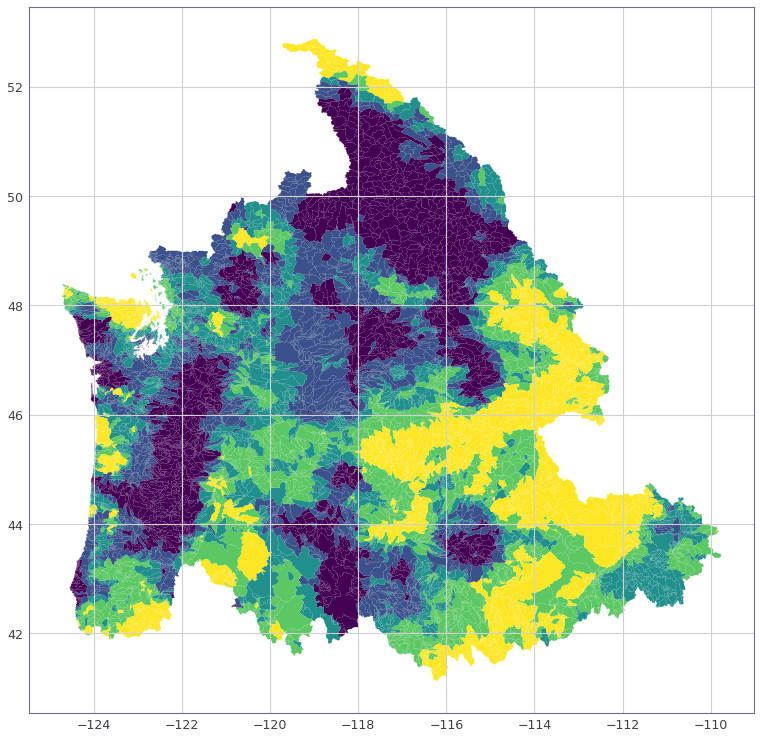

In [ ]:
def spatialplot(tindex):
    summasel = summaout.isel(time = tindex)['pptrate'].drop('time').to_dataframe()
    summasel['hru_id2'] = summasel.index
    polydat2 = pd.merge(polydat, summasel)
    
    #Plot
    fig, ax = plt.subplots(1, figsize=(13, 13))
    polydat2.plot(ax = ax, column = 'pptrate', cmap='viridis_r', scheme='quantiles')  #Plots the polygons
    plt.show()
    return(fig)

spatialplot(11)

In [1]:
def animate(i):
    ax.set_title(ds['time'].values[i])
    return (plt.pcolormesh(ds['shortwave'].isel(time=i), vmin=0, vmax=400),)
  
a = ani.FuncAnimation(fig, animate, frames=40, blit=True)
HTML(a.to_html5_video())

NameError: name 'fig' is not defined